# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# visualize the weather of over 500 cities of varying distances from the equator

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each l|at, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | cill airne
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | dalbandin
Processing Record 9 of Set 1 | nuuk
Processing Record 10 of Set 1 | malabar
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | inongo
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | roma
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | gadzhiyevo
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.72,68,100,8.80,SH,1690316619
1,tazovsky,67.4667,78.7000,13.05,76,38,4.66,RU,1690316619
2,cill airne,52.0500,-9.5167,14.49,89,40,1.80,IE,1690316619
3,puerto natales,-51.7236,-72.4875,0.34,79,8,2.26,CL,1690316498
4,grytviken,-54.2811,-36.5092,-3.64,80,67,4.93,GS,1690316498


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_IR.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_IR.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.72,68,100,8.80,SH,1690316619
1,tazovsky,67.4667,78.7000,13.05,76,38,4.66,RU,1690316619
2,cill airne,52.0500,-9.5167,14.49,89,40,1.80,IE,1690316619
3,puerto natales,-51.7236,-72.4875,0.34,79,8,2.26,CL,1690316498
4,grytviken,-54.2811,-36.5092,-3.64,80,67,4.93,GS,1690316498


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\sunny\AppData\Local\Temp\ipykernel_13168\3616801766.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Max Latitude vs. Temperature ' + '(' + str(pd.datetime.now().date()) + ')')


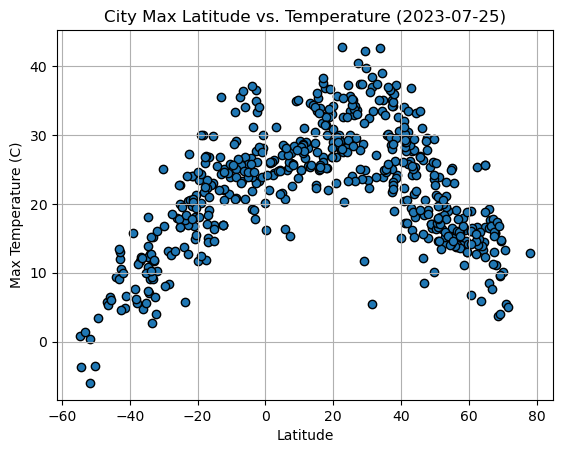

In [12]:
# Build scatter plot for latitude vs. temperature
x_temp = city_data_df['Lat']
y_temp = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_temp, y_temp, edgecolor='black', linewidth=1, marker='o')
plt.title('City Max Latitude vs. Temperature ' + '(' + str(pd.datetime.now().date()) + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1_IR.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

C:\Users\sunny\AppData\Local\Temp\ipykernel_13168\1208382558.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')')


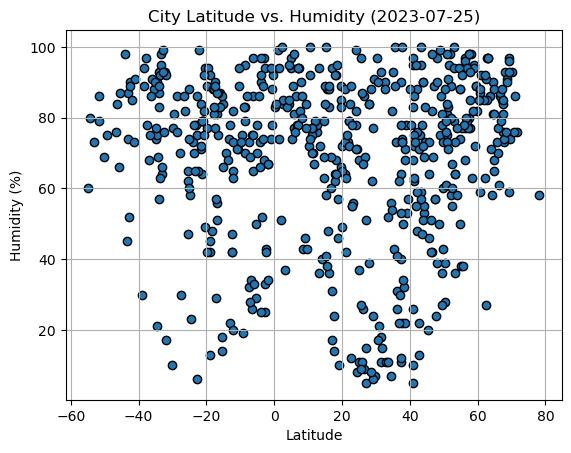

In [13]:
# Build the scatter plots for latitude vs. humidity
x_hum = city_data_df['Lat']
y_hum = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_hum, y_hum, edgecolor='black', linewidth=1, marker='o')
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2_IR.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\sunny\AppData\Local\Temp\ipykernel_13168\232577229.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')')


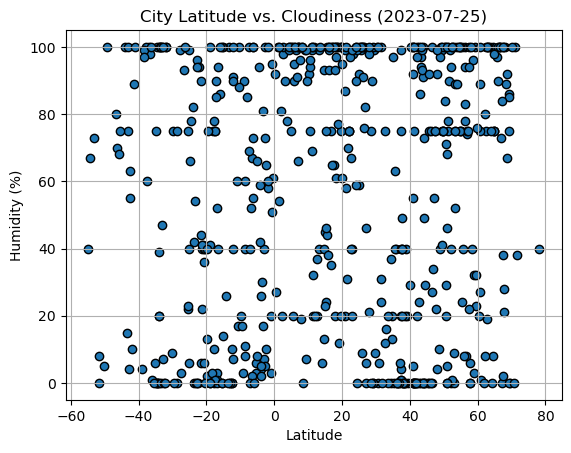

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_cloud = city_data_df['Lat']
y_cloud = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_cloud, y_cloud, edgecolor='black', linewidth=1, marker='o')
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3_IR.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\sunny\AppData\Local\Temp\ipykernel_13168\2943293766.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')')


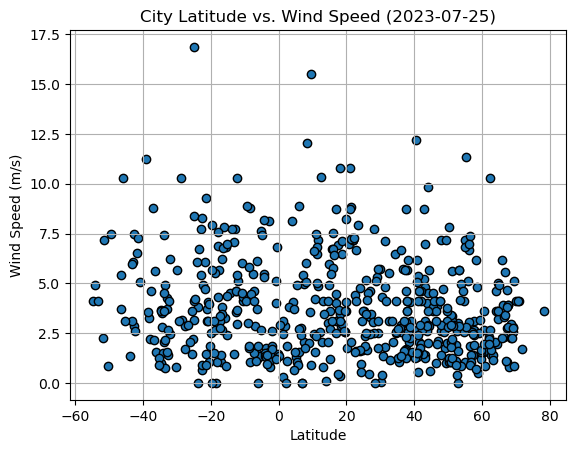

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_wind = city_data_df['Lat']
y_wind = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_wind, y_wind, edgecolor='black', linewidth=1, marker='o')
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4_IR.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def lin_reg(x, y, x_label, y_label, coordinates):
    # formula
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regression = (slope * x) + intercept
    line_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
    
    # plot
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, marker='o')
    plt.plot(x, regression, 'r-')
    plt.title(f"{x_label} vs. {y_label} Linear Regression Plot")
    plt.annotate(line_eq, coordinates, color='r', fontsize=15)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tazovsky,67.4667,78.7000,13.05,76,38,4.66,RU,1690316619
2,cill airne,52.0500,-9.5167,14.49,89,40,1.80,IE,1690316619
5,ust-nera,64.5667,143.2000,14.44,81,100,1.97,RU,1690316619
7,dalbandin,28.8947,64.4101,28.70,62,90,5.33,PK,1690316620
8,nuuk,64.1835,-51.7216,13.34,58,0,3.60,GL,1690316620


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.72,68,100,8.80,SH,1690316619
3,puerto natales,-51.7236,-72.4875,0.34,79,8,2.26,CL,1690316498
4,grytviken,-54.2811,-36.5092,-3.64,80,67,4.93,GS,1690316498
6,avarua,-21.2078,-159.7750,24.03,64,40,3.09,CK,1690316534
9,malabar,-33.9667,151.2500,10.44,87,20,3.60,AU,1690316620


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6231503027236898


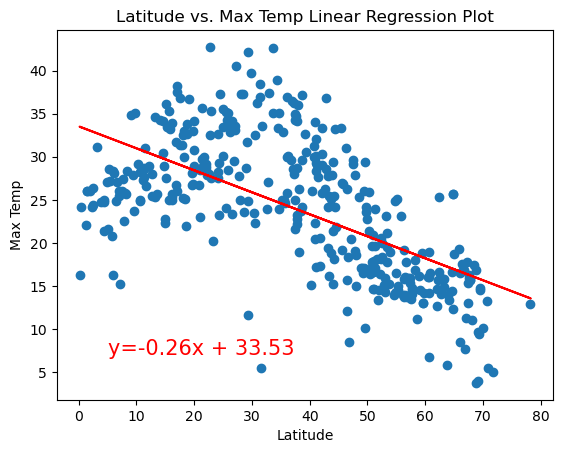

In [51]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (5,7))

The r-value is: 0.8435646357908371


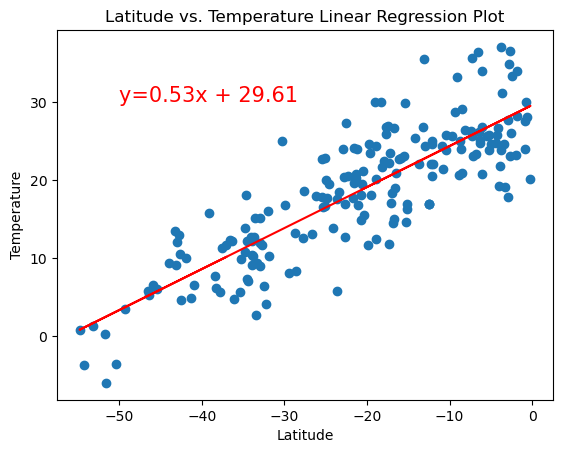

In [54]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],'Latitude', 'Max Temp', (-50, 30))

**Discussion about the linear relationship:**
The northern hemisphere has a negative correletion between the latitude and maximum temperature, while the southern hemisphere has a positive correlation. The farther the city is from the equator, the lower the maximum temperature becomes. The southern hemisphere has a stronger correlation between the latitude and maximum temperature than the northern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11228663739699528


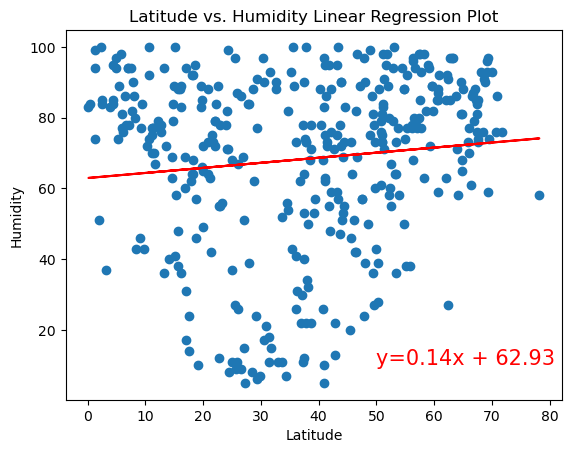

In [56]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],'Latitude', 'Humidity', (50,10))

The r-value is: -0.1781948366065627


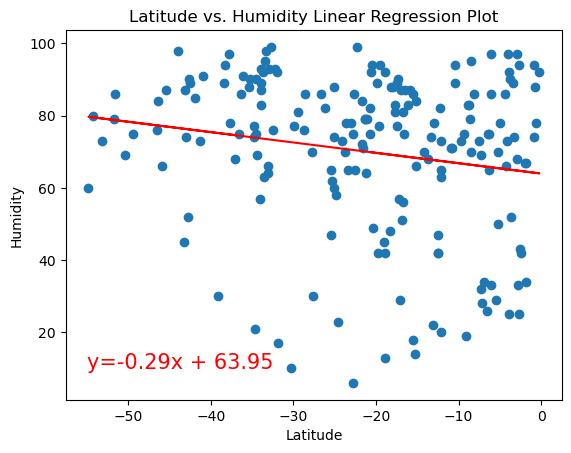

In [58]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],'Latitude', 'Humidity', (-55,10))

**Discussion about the linear relationship:**
The northern hemisphere has a positive correletion between the latitude and maximum temperature, while the southern hemisphere has a negative correlation. The farther the city is from the equator, the higher the city's humidity is. Both hemispheres's correlation are weak, they have almost 0 correlation between the humidity and how far a city is from the equator. There is also a broad range of humidity levels for some of the cities with latitides that are the same or close to each other.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.12184825105599872


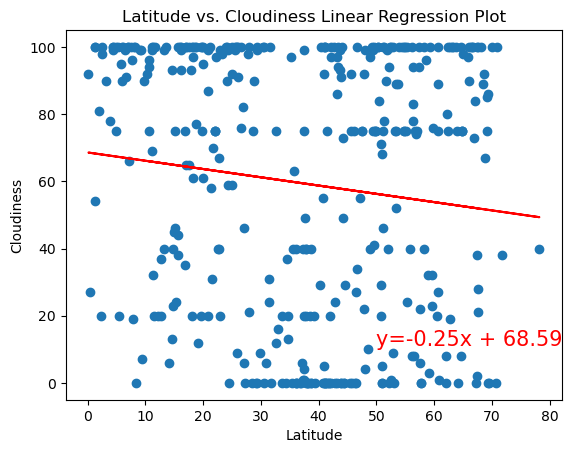

In [60]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],'Latitude', 'Cloudiness', (50,11))

The r-value is: -0.09904593933482317


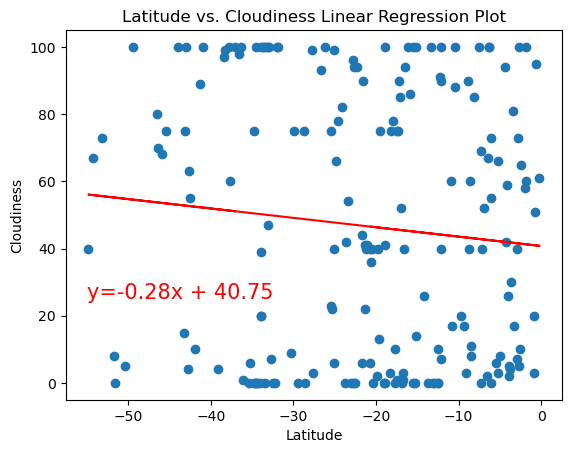

In [63]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],'Latitude', 'Cloudiness', (-55,25))

**Discussion about the linear relationship:**
Both the northern hemisphere and southern hemisphere have a negative correletion between the latitude and cloudiness. The farther the city is from the equator, the less cloudier it is. Both hemispheres's correlation are weak, they have almost 0 correlation between the cloudiness and how far a city is from the equator. Both plots are showing very scattered values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14685815038452282


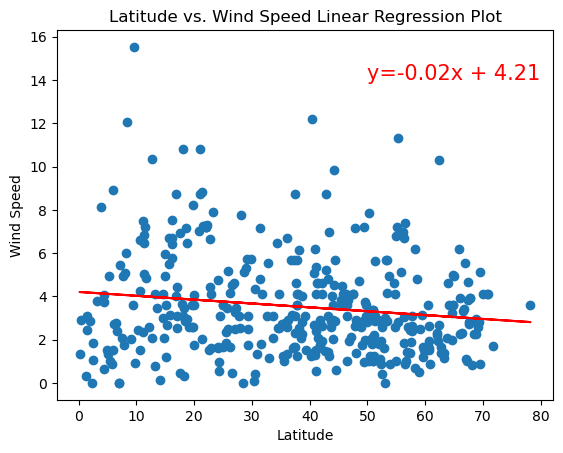

In [65]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],'Latitude', 'Wind Speed', (50,14))

The r-value is: -0.11204594284125961


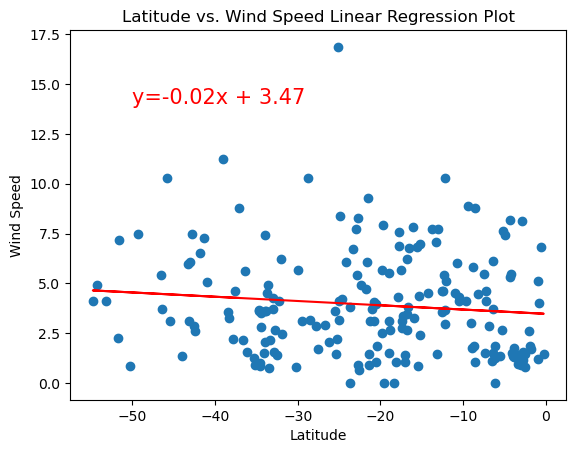

In [66]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],'Latitude', 'Wind Speed', (-50,14))

**Discussion about the linear relationship:**
Both the northern hemisphere and southern hemisphere have a negative correletion between the latitude and wind speed. The city is windier the closer it is to the equator. Even though both plots have almost 0 correlation with how windy the city is depending on how far the city is from the equator, they are showing closer scattered values than both the Latitude vs. Humidity plots.